In [1]:
# path to requirements.txt
!pip install -r /data/workspace_files/requirements.txt


[notice] A new release of pip available: 22.2 -> 22.2.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import pathlib
import sys

home = str(pathlib.Path().resolve().parent) 
sys.path.insert(0, home)

from src.data_loading import load_data
from src.errors import plot_parameters_space, plot_errors
from src.main import number_analysis, error_analysis, data_analysis
home

'/data'

In [3]:
import pandas as pd
import numpy as np
import os as os
import matplotlib.pyplot as plt

In [7]:
datadirs = {'Ri 128DOSY', 'R2-R4', 'R2-R5', 'R1-R2'}
#datadirs = {'R2_5times'}
n_min = 1
n_max = 4
method = 'BFGS'
reg = 0.005
conf_level=2
all_res = {}
for datadir in datadirs:
    results_ = {}
    dirname = str(pathlib.Path('/data/workspace_files', 'data/'+datadir+'/'))
    for filename in os.listdir(dirname):
        if filename.endswith('.txt'):
            with open(os.path.join(dirname, filename), 'r') as f: # open in readonly mode
                expname = filename.split('.')[0]
                x, y = load_data(f.name, scale=1e6)
                #params, m_aic, m_bic, cons_number = number_analysis(x, y, n_min=n_min, n_max=n_max, method=method, reg=reg)
                indx, theta_opt, sigmas, params = data_analysis(x, y, n_min=n_min, n_max=n_max,
                                                                method=method, reg=reg, conf_level=conf_level)
                result = {}
                result['number'] = indx
                for i in range(len(theta_opt)):
                    if i%2 == 0:
                        w = f'w{i//2 + 1}'#+str(j//2 + 1)+str(i)
                        result[w] = theta_opt[i]
                        ws = f'w_sigma{i//2 + 1}'
                        result[ws] = sigmas[i]
                    else:
                        D = f'D{i//2 + 1}'#+str(j//2 + 1)+str(i)
                        result[D] = theta_opt[i]
                        Ds = f'D_sigma{i//2 + 1}'
                        result[Ds] = sigmas[i]
                    
        results_[expname] = result
    results = pd.DataFrame(results_).T
    results.to_csv(f'{datadir}.csv')
    all_res[datadir] = results

In [8]:
for key, item in all_res.items():
    item.to_csv(f'{key}_curve_fit.csv')

In [20]:
all_res['R2_5times']#, all_res['R2_5times'].std()

,number,w1,w_sigma1,D1,D_sigma1,w2,w_sigma2,D2,D_sigma2
DOSY-R2-1-4-DMSO-128points-1,1.0,0.992793,0.000627,1.111630,0.001034,NaN,NaN,NaN,NaN
DOSY-R2-1-4-DMSO-128points-3,2.0,0.947778,0.021406,1.079657,0.006309,0.05464,0.021172,2.36653,0.156423
DOSY-R2-1-4-DMSO-128points-2,1.0,1.018568,0.001207,1.107180,0.001844,NaN,NaN,NaN,NaN
DOSY-R2-1-4-DMSO-128points-4,1.0,0.998207,0.000515,1.118136,0.000829,NaN,NaN,NaN,NaN
DOSY-R2-1-4-DMSO-128points-5,1.0,0.997153,0.000539,1.134847,0.000905,NaN,NaN,NaN,NaN


In [18]:
data_analysis(x, y, n_min=1, n_max=3, method='BFGS', reg=0.005)

2


(2,
 array([0.00113135, 0.15115824, 0.9976185 , 1.12130326]),
 array([0.00852871, 0.05494932, 0.00852863, 0.00213275]),
 [array([0.99819325, 1.11811187]),
  array([0.00113135, 0.15115824, 0.9976185 , 1.12130326]),
  array([-0.04142502,  0.4345479 ,  0.31163756,  0.79520201,  0.73079371,
          1.23821448])])

In [16]:
x, y = load_data('/data/workspace_files/data/Ri 128DOSY/R1 128DOSY.txt', scale=1e6)

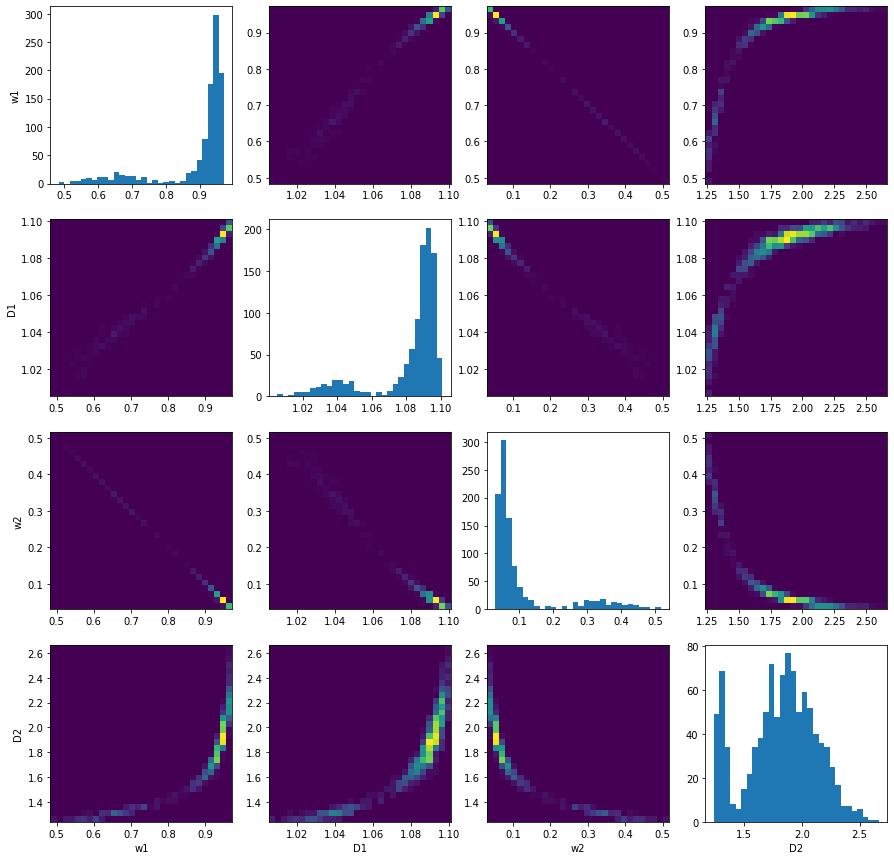

In [9]:
init_theta, thetas, res = error_analysis(2, x, y, method='BFGS', reg=0.001)
plot_parameters_space(thetas)
print(np.std(thetas, axis=0))